Ufuk Altun

using Pkg; pkg"add CUDA Knet IterTools FileIO JLD2 Images Plots PyCall"

In [1]:
using PyCall
@pyimport torch

In [2]:
include("models.jl");
include("training.jl");
include("optimizer.jl");

## Generate an alexnet model

In [3]:
model = generate_alexnet_model(7; pretrained = true);
# 7 for PACS
# 5 for VLCS

#### Set optimizer of each parameter to Adam with weight decay=5e-5.

In [4]:
weight_decay = 5e-5
wdecay_func = function(w)
    length(size(w))==1 ? 0 : weight_decay
end
for param in params(model)
    param.opt = AdamW(; lr=1e-5, eps=1e-8, wdecayfunc=wdecay_func, scheduler=nothing)
    println(size(param))
end

(11, 11, 3, 64)
(1, 1, 64, 1)
(5, 5, 64, 192)
(1, 1, 192, 1)
(3, 3, 192, 384)
(1, 1, 384, 1)
(3, 3, 384, 256)
(1, 1, 256, 1)
(3, 3, 256, 256)
(1, 1, 256, 1)
(4096, 9216)
(4096,)
(4096, 4096)
(4096,)
(7, 4096)
(7,)


## Hyperparameters

In [5]:
num_iter=600
check_freq=20
batchsize = 128
atype = Array{Float32}
data_path = "/Users/ufukaltun/Documents/koç/dersler/ku deep learning/project/data";

## Training of the Baseline model for "PACS" dataset and "cartoon" target domain

In [6]:
loss, acc = train("b", "PACS", "cartoon", model; num_iter=num_iter, 
                                                 check_freq=check_freq, 
                                                 batchsize=batchsize, 
                                                 data_path=data_path, 
                                                 atype=atype);

Datasets are loaded


[1, 00:01, 1.95i/s] 

First batch is trained successfully


[20, 11:31, 35.00s/i] 

Train loss: 1.6787204  Val loss: 1.6856421  Train acc: 0.33874198717948717  Val acc: 0.34375


[40, 28:32, 34.39s/i]  

Train loss: 1.3565294  Val loss: 1.3838557  Train acc: 0.4901842948717949  Val acc: 0.4739583333333333


[60, 45:05, 33.85s/i]  

Train loss: 1.1438382  Val loss: 1.2210327  Train acc: 0.5801282051282052  Val acc: 0.5416666666666666


[80, 01:01:40, 34.14s/i] 

Train loss: 0.98494685  Val loss: 1.0410441  Train acc: 0.6418269230769231  Val acc: 0.6015625


[100, 01:18:05, 33.25s/i] 

Train loss: 0.8539039  Val loss: 0.9607052  Train acc: 0.6925080128205128  Val acc: 0.625


[120, 01:34:49, 36.52s/i]  

Train loss: 0.7410246  Val loss: 0.92725563  Train acc: 0.7327724358974359  Val acc: 0.6875


[140, 01:51:21, 33.85s/i]  

Train loss: 0.66513884  Val loss: 0.7364555  Train acc: 0.7654246794871795  Val acc: 0.71875


[160, 02:07:56, 36.07s/i]  

Train loss: 0.5903172  Val loss: 0.7411912  Train acc: 0.7950721153846154  Val acc: 0.7005208333333334


[180, 02:24:30, 35.02s/i]  

Train loss: 0.53600025  Val loss: 0.7625713  Train acc: 0.8125  Val acc: 0.7239583333333334


[200, 02:41:02, 36.29s/i]  

Train loss: 0.48451513  Val loss: 0.76085895  Train acc: 0.8293269230769231  Val acc: 0.7239583333333334


[220, 02:57:38, 35.63s/i]  

Train loss: 0.43955034  Val loss: 0.67020273  Train acc: 0.8509615384615384  Val acc: 0.7395833333333334


[240, 03:14:19, 46.94s/i]  

Train loss: 0.39464548  Val loss: 0.68642014  Train acc: 0.8611778846153846  Val acc: 0.7578125


[260, 03:30:49, 34.43s/i]  

Train loss: 0.36247984  Val loss: 0.6659321  Train acc: 0.8760016025641025  Val acc: 0.7760416666666666


[280, 03:47:39, 33.50s/i]  

Train loss: 0.32558644  Val loss: 0.5723179  Train acc: 0.8912259615384616  Val acc: 0.78125


[300, 04:04:19, 37.67s/i]  

Train loss: 0.2981225  Val loss: 0.59987575  Train acc: 0.9008413461538461  Val acc: 0.7786458333333334


[320, 04:20:48, 32.93s/i]  

Train loss: 0.27385554  Val loss: 0.562179  Train acc: 0.9108573717948718  Val acc: 0.7708333333333334


[340, 04:37:18, 33.64s/i]  

Train loss: 0.24314521  Val loss: 0.6063965  Train acc: 0.9206730769230769  Val acc: 0.7890625


[360, 04:53:47, 33.60s/i]  

Train loss: 0.2231558  Val loss: 0.57355493  Train acc: 0.9290865384615384  Val acc: 0.8020833333333334


[380, 05:10:24, 33.44s/i]  

Train loss: 0.2092831  Val loss: 0.55476475  Train acc: 0.9332932692307693  Val acc: 0.7994791666666666


[400, 05:26:45, 34.87s/i]  

Train loss: 0.18605988  Val loss: 0.62910813  Train acc: 0.9407051282051282  Val acc: 0.8177083333333334


[420, 05:43:50, 33.95s/i]  

Train loss: 0.16692302  Val loss: 0.5302008  Train acc: 0.9499198717948718  Val acc: 0.7994791666666666


[440, 06:00:14, 33.61s/i]  

Train loss: 0.14677735  Val loss: 0.5301483  Train acc: 0.9555288461538461  Val acc: 0.7994791666666666


[460, 06:16:37, 33.60s/i]  

Train loss: 0.13702211  Val loss: 0.5661866  Train acc: 0.9597355769230769  Val acc: 0.8203125


[480, 06:33:26, 38.46s/i]  

Train loss: 0.1202077  Val loss: 0.58921564  Train acc: 0.9657451923076923  Val acc: 0.796875


[500, 06:51:39, 38.42s/i]  

Train loss: 0.110721834  Val loss: 0.57243174  Train acc: 0.9697516025641025  Val acc: 0.8098958333333334


[520, 07:09:32, 37.31s/i]  

Train loss: 0.09525709  Val loss: 0.5168133  Train acc: 0.9749599358974359  Val acc: 0.8567708333333334


[540, 07:28:04, 36.73s/i]  

Train loss: 0.08402947  Val loss: 0.58337146  Train acc: 0.9823717948717948  Val acc: 0.8203125


[560, 07:46:01, 34.78s/i]  

Train loss: 0.07678236  Val loss: 0.5631447  Train acc: 0.9815705128205128  Val acc: 0.8020833333333334


[580, 08:03:05, 34.66s/i]  

Train loss: 0.06930329  Val loss: 0.5276916  Train acc: 0.9871794871794872  Val acc: 0.8203125


[600, 08:19:51, 35.23s/i]  

Train loss: 0.06082988  Val loss: 0.56713593  Train acc: 0.9879807692307693  Val acc: 0.8411458333333334
Training ended successfully, saving the results
Test loss: 1.8050127  Test acc: 0.5104166666666666


## Training of the Gradient Surgery model for "PACS" dataset and "cartoon" target domain

In [7]:
model = generate_alexnet_model(7; pretrained = true);

for param in params(model)
    param.opt = AdamW(; lr=1e-5, eps=1e-8, wdecayfunc=wdecay_func, scheduler=nothing)
end

loss, acc = train("gs", "PACS", "cartoon", model; num_iter=num_iter, 
                                                 check_freq=check_freq, 
                                                 batchsize=batchsize, 
                                                 data_path=data_path, 
                                                 atype=atype);

Datasets are loaded


[1, 00:01, 1.61i/s] 

First batch is trained successfully


[20, 11:55, 37.09s/i] 

Train loss: 2.0275526  Val loss: 2.053884  Train acc: 0.2311698717948718  Val acc: 0.25


[40, 29:50, 36.64s/i]  

Train loss: 1.7016509  Val loss: 1.6994033  Train acc: 0.351161858974359  Val acc: 0.3411458333333333


[60, 47:35, 38.35s/i]  

Train loss: 1.5250268  Val loss: 1.5336413  Train acc: 0.4088541666666667  Val acc: 0.4270833333333333


[80, 01:05:18, 38.59s/i] 

Train loss: 1.3917006  Val loss: 1.3891727  Train acc: 0.4583333333333333  Val acc: 0.4817708333333333


[100, 01:23:07, 40.26s/i] 

Train loss: 1.2886156  Val loss: 1.3281931  Train acc: 0.49919871794871795  Val acc: 0.515625


[120, 01:41:13, 39.07s/i]  

Train loss: 1.1949122  Val loss: 1.2053381  Train acc: 0.5434695512820513  Val acc: 0.5494791666666666


[140, 01:59:30, 39.22s/i]  

Train loss: 1.1196612  Val loss: 1.0981107  Train acc: 0.5739182692307693  Val acc: 0.5729166666666666


[160, 02:17:54, 37.20s/i]  

Train loss: 1.0600164  Val loss: 1.022813  Train acc: 0.5997596153846154  Val acc: 0.5885416666666666


[180, 02:35:47, 38.24s/i]  

Train loss: 1.0056462  Val loss: 0.96792036  Train acc: 0.6235977564102564  Val acc: 0.6328125


[200, 02:54:17, 37.86s/i]  

Train loss: 0.96645534  Val loss: 0.9509186  Train acc: 0.6412259615384616  Val acc: 0.6536458333333334


[220, 03:12:21, 37.39s/i]  

Train loss: 0.92541325  Val loss: 0.8606388  Train acc: 0.6538461538461539  Val acc: 0.6666666666666666


[240, 03:30:19, 38.11s/i]  

Train loss: 0.88986903  Val loss: 0.8515284  Train acc: 0.6644631410256411  Val acc: 0.671875


[260, 03:48:22, 43.76s/i]  

Train loss: 0.8731131  Val loss: 0.8167507  Train acc: 0.6790865384615384  Val acc: 0.7005208333333334


[280, 04:06:36, 37.95s/i]  

Train loss: 0.8436049  Val loss: 0.86286956  Train acc: 0.6889022435897436  Val acc: 0.7213541666666666


[300, 04:25:20, 38.88s/i]  

Train loss: 0.8220244  Val loss: 0.8089796  Train acc: 0.694511217948718  Val acc: 0.7213541666666666


[320, 04:44:05, 46.46s/i]  

Train loss: 0.81840324  Val loss: 0.75262976  Train acc: 0.702323717948718  Val acc: 0.71875


[340, 05:02:32, 42.03s/i]  

Train loss: 0.80572164  Val loss: 0.78845733  Train acc: 0.7095352564102564  Val acc: 0.7291666666666666


[360, 05:21:52, 39.94s/i]  

Train loss: 0.8056403  Val loss: 0.764574  Train acc: 0.7123397435897436  Val acc: 0.6901041666666666


[380, 05:40:31, 40.92s/i]  

Train loss: 0.80817956  Val loss: 0.7778575  Train acc: 0.7201522435897436  Val acc: 0.7447916666666666


[400, 05:59:09, 39.67s/i]  

Train loss: 0.79404604  Val loss: 0.75427824  Train acc: 0.7267628205128205  Val acc: 0.7447916666666666


[420, 06:17:52, 38.93s/i]  

Train loss: 0.79693896  Val loss: 0.7776672  Train acc: 0.7263621794871795  Val acc: 0.7135416666666666


[440, 06:37:53, 43.27s/i]  

Train loss: 0.7943028  Val loss: 0.7790149  Train acc: 0.7317708333333334  Val acc: 0.7578125


[460, 06:58:21, 42.57s/i]  

Train loss: 0.7875539  Val loss: 0.73806936  Train acc: 0.7355769230769231  Val acc: 0.7760416666666666


[480, 07:18:35, 42.75s/i]  

Train loss: 0.78438145  Val loss: 0.77516395  Train acc: 0.7357772435897436  Val acc: 0.7473958333333334


[500, 07:39:39, 41.80s/i]  

Train loss: 0.7774089  Val loss: 0.77098656  Train acc: 0.7439903846153846  Val acc: 0.7369791666666666


[520, 07:59:59, 40.07s/i]  

Train loss: 0.79722506  Val loss: 0.7154035  Train acc: 0.7407852564102564  Val acc: 0.7734375


[540, 08:19:43, 40.85s/i]  

Train loss: 0.793579  Val loss: 0.8531053  Train acc: 0.7495993589743589  Val acc: 0.7734375


[560, 08:39:22, 44.91s/i]  

Train loss: 0.8092729  Val loss: 0.7485915  Train acc: 0.7481971153846154  Val acc: 0.7604166666666666


[580, 08:59:32, 40.40s/i]  

Train loss: 0.800198  Val loss: 0.81911105  Train acc: 0.7504006410256411  Val acc: 0.7552083333333334


[600, 09:19:27, 39.02s/i]  

Train loss: 0.8081786  Val loss: 0.8643406  Train acc: 0.7526041666666666  Val acc: 0.7604166666666666
Training ended successfully, saving the results
Test loss: 2.1344788  Test acc: 0.4765625


## Training of the Baseline model for "VLCS" dataset and "LabelMe" target domain

In [27]:
model = generate_alexnet_model(5; pretrained = true);

for param in params(model)
    param.opt = AdamW(; lr=1e-5, eps=1e-8, wdecayfunc=wdecay_func, scheduler=nothing)
end

loss, acc = train("b", "VLCS", "LabelMe", model; num_iter=num_iter, 
                                                 check_freq=check_freq, 
                                                 batchsize=batchsize, 
                                                 data_path=data_path, 
                                                 atype=atype);

Datasets are loaded


[1, 00:00, 2.81i/s] 

First batch is trained successfully


[20, 12:05, 34.52s/i] 

Train loss: 1.1513153  Val loss: 1.135947  Train acc: 0.5321800595238095  Val acc: 0.5299479166666666


[40, 30:50, 36.41s/i]  

Train loss: 0.9775066  Val loss: 0.96565443  Train acc: 0.6015625  Val acc: 0.6067708333333334


[60, 50:04, 36.30s/i]  

Train loss: 0.8802352  Val loss: 0.87769705  Train acc: 0.6439732142857143  Val acc: 0.62890625


[80, 01:10:29, 39.11s/i] 

Train loss: 0.8058723  Val loss: 0.8204458  Train acc: 0.6796875  Val acc: 0.65625


[100, 01:30:00, 39.00s/i] 

Train loss: 0.75768507  Val loss: 0.7818651  Train acc: 0.7044270833333334  Val acc: 0.6666666666666666


[120, 01:49:22, 35.80s/i]  

Train loss: 0.7072712  Val loss: 0.7452085  Train acc: 0.7250744047619048  Val acc: 0.6888020833333334


[140, 02:08:15, 35.96s/i]  

Train loss: 0.67503875  Val loss: 0.72255665  Train acc: 0.7473958333333334  Val acc: 0.7083333333333334


[160, 02:27:46, 36.32s/i]  

Train loss: 0.63901454  Val loss: 0.69781405  Train acc: 0.7553943452380952  Val acc: 0.72265625


[180, 02:47:15, 52.95s/i]  

Train loss: 0.61082983  Val loss: 0.68689203  Train acc: 0.7706473214285714  Val acc: 0.7291666666666666


[200, 03:06:08, 36.10s/i]  

Train loss: 0.5799944  Val loss: 0.67499256  Train acc: 0.7877604166666666  Val acc: 0.7356770833333334


[220, 03:24:47, 37.33s/i]  

Train loss: 0.5526047  Val loss: 0.6710919  Train acc: 0.7965029761904762  Val acc: 0.7447916666666666


[240, 03:43:49, 35.68s/i]  

Train loss: 0.5271956  Val loss: 0.65759265  Train acc: 0.8063616071428571  Val acc: 0.7356770833333334


[260, 04:02:38, 35.52s/i]  

Train loss: 0.50652283  Val loss: 0.6607219  Train acc: 0.8177083333333334  Val acc: 0.75


[280, 04:23:49, 45.03s/i]  

Train loss: 0.48544177  Val loss: 0.64813185  Train acc: 0.8236607142857143  Val acc: 0.75


[300, 04:44:12, 40.61s/i]  

Train loss: 0.45816883  Val loss: 0.63855237  Train acc: 0.8325892857142857  Val acc: 0.7421875


[320, 05:02:52, 35.79s/i]  

Train loss: 0.43959054  Val loss: 0.633425  Train acc: 0.8428199404761905  Val acc: 0.7473958333333334


[340, 05:20:51, 35.80s/i]  

Train loss: 0.42392752  Val loss: 0.6454899  Train acc: 0.8469122023809523  Val acc: 0.7447916666666666


[360, 05:39:30, 37.06s/i]  

Train loss: 0.39943036  Val loss: 0.6315019  Train acc: 0.8575148809523809  Val acc: 0.7421875


[380, 05:57:39, 36.35s/i]  

Train loss: 0.3714845  Val loss: 0.6160182  Train acc: 0.8725818452380952  Val acc: 0.7552083333333334


[400, 06:16:13, 38.01s/i]  

Train loss: 0.35378578  Val loss: 0.61963284  Train acc: 0.8805803571428571  Val acc: 0.7447916666666666


[420, 06:34:32, 35.71s/i]  

Train loss: 0.32991633  Val loss: 0.629067  Train acc: 0.8941592261904762  Val acc: 0.7473958333333334


[440, 06:52:40, 43.45s/i]  

Train loss: 0.31359124  Val loss: 0.61711323  Train acc: 0.9030877976190477  Val acc: 0.74609375


[460, 07:10:58, 36.51s/i]  

Train loss: 0.29687244  Val loss: 0.6226542  Train acc: 0.9105282738095238  Val acc: 0.75


[480, 07:29:35, 40.01s/i]  

Train loss: 0.2716624  Val loss: 0.6232052  Train acc: 0.9187127976190477  Val acc: 0.75390625


[500, 07:48:31, 39.89s/i]  

Train loss: 0.2530168  Val loss: 0.62439907  Train acc: 0.9265252976190477  Val acc: 0.7447916666666666


[520, 08:07:03, 44.02s/i]  

Train loss: 0.23558901  Val loss: 0.6218956  Train acc: 0.9334077380952381  Val acc: 0.7447916666666666


[540, 08:25:06, 37.49s/i]  

Train loss: 0.22621334  Val loss: 0.6511651  Train acc: 0.9326636904761905  Val acc: 0.7486979166666666


[560, 08:43:53, 41.84s/i]  

Train loss: 0.20562777  Val loss: 0.63643646  Train acc: 0.9477306547619048  Val acc: 0.75390625


[580, 09:02:32, 36.99s/i]  

Train loss: 0.18742286  Val loss: 0.6265554  Train acc: 0.9534970238095238  Val acc: 0.7486979166666666


[600, 09:20:52, 36.59s/i]  

Train loss: 0.17268212  Val loss: 0.64927673  Train acc: 0.9587053571428571  Val acc: 0.75
Training ended successfully, saving the results
Test loss: 1.1650126  Test acc: 0.53125


## Training of the Gradient Surgery model for "VLCS" dataset and "LabelMe" target domain

In [28]:
model = generate_alexnet_model(5; pretrained = true);

for param in params(model)
    param.opt = AdamW(; lr=1e-5, eps=1e-8, wdecayfunc=wdecay_func, scheduler=nothing)
end

loss, acc = train("gs", "VLCS", "LabelMe", model; num_iter=num_iter, 
                                                 check_freq=check_freq, 
                                                 batchsize=batchsize, 
                                                 data_path=data_path, 
                                                 atype=atype);

Datasets are loaded


[1, 00:01, 1.01i/s] 

First batch is trained successfully


[20, 13:52, 40.29s/i] 

Train loss: 1.3424387  Val loss: 1.3209844  Train acc: 0.46242559523809523  Val acc: 0.4856770833333333


[40, 33:55, 40.50s/i]  

Train loss: 1.1733599  Val loss: 1.1657349  Train acc: 0.5135788690476191  Val acc: 0.5403645833333334


[60, 54:24, 43.30s/i]  

Train loss: 1.0846484  Val loss: 1.0700165  Train acc: 0.5554315476190477  Val acc: 0.56640625


[80, 01:15:16, 45.25s/i]  

Train loss: 1.0249466  Val loss: 1.0012525  Train acc: 0.5788690476190477  Val acc: 0.59375


[100, 01:36:00, 42.32s/i] 

Train loss: 0.97642934  Val loss: 0.965387  Train acc: 0.6021205357142857  Val acc: 0.6184895833333334


[120, 01:56:36, 40.20s/i]  

Train loss: 0.9490515  Val loss: 0.9498855  Train acc: 0.6181175595238095  Val acc: 0.6302083333333334


[140, 02:17:12, 40.86s/i]  

Train loss: 0.92991936  Val loss: 0.92860925  Train acc: 0.6303943452380952  Val acc: 0.6432291666666666


[160, 02:39:27, 53.60s/i]  

Train loss: 0.9143176  Val loss: 0.90962946  Train acc: 0.6409970238095238  Val acc: 0.6484375


[180, 03:02:42, 52.55s/i]  

Train loss: 0.90148485  Val loss: 0.90440893  Train acc: 0.6499255952380952  Val acc: 0.6666666666666666


[200, 03:23:20, 41.09s/i]  

Train loss: 0.8950664  Val loss: 0.8936654  Train acc: 0.6573660714285714  Val acc: 0.66015625


[220, 03:44:31, 44.37s/i]  

Train loss: 0.89462656  Val loss: 0.9031359  Train acc: 0.6607142857142857  Val acc: 0.6627604166666666


[240, 04:04:10, 41.04s/i]  

Train loss: 0.8961543  Val loss: 0.90533906  Train acc: 0.6633184523809523  Val acc: 0.6744791666666666


[260, 04:25:05, 41.11s/i]  

Train loss: 0.90842646  Val loss: 0.9141401  Train acc: 0.6674107142857143  Val acc: 0.6653645833333334


[280, 04:46:14, 41.92s/i]  

Train loss: 0.90359277  Val loss: 0.92397606  Train acc: 0.6698288690476191  Val acc: 0.6705729166666666


[300, 05:06:42, 42.49s/i]  

Train loss: 0.92485493  Val loss: 0.94760966  Train acc: 0.6715029761904762  Val acc: 0.671875


[320, 05:27:59, 49.16s/i]  

Train loss: 0.9332823  Val loss: 0.96936584  Train acc: 0.6685267857142857  Val acc: 0.67578125


[340, 05:48:54, 44.43s/i]  

Train loss: 0.95302117  Val loss: 0.97519267  Train acc: 0.6715029761904762  Val acc: 0.66796875


[360, 06:10:01, 47.80s/i]  

Train loss: 0.9829686  Val loss: 1.0221357  Train acc: 0.6793154761904762  Val acc: 0.6731770833333334


[380, 06:30:57, 46.89s/i]  

Train loss: 1.009907  Val loss: 1.0533735  Train acc: 0.6774553571428571  Val acc: 0.671875


[400, 06:51:19, 50.26s/i]  

Train loss: 1.034641  Val loss: 1.0749856  Train acc: 0.6722470238095238  Val acc: 0.6666666666666666


[420, 07:12:47, 43.20s/i]  

Train loss: 1.0597409  Val loss: 1.0704823  Train acc: 0.6763392857142857  Val acc: 0.6640625


[440, 07:35:33, 48.76s/i]  

Train loss: 1.0884781  Val loss: 1.1209594  Train acc: 0.6781994047619048  Val acc: 0.6692708333333334


[460, 07:57:01, 51.03s/i]  

Train loss: 1.1314226  Val loss: 1.1762004  Train acc: 0.6739211309523809  Val acc: 0.6640625


[480, 08:18:59, 45.30s/i]  

Train loss: 1.1518766  Val loss: 1.2172275  Train acc: 0.6770833333333334  Val acc: 0.6692708333333334


[500, 08:40:03, 41.06s/i]  

Train loss: 1.2022926  Val loss: 1.2771195  Train acc: 0.6761532738095238  Val acc: 0.6796875


[520, 09:02:13, 44.17s/i]  

Train loss: 1.2259189  Val loss: 1.2976096  Train acc: 0.6761532738095238  Val acc: 0.66796875


[540, 09:22:55, 42.36s/i]  

Train loss: 1.2404544  Val loss: 1.3020332  Train acc: 0.6804315476190477  Val acc: 0.6796875


[560, 09:44:36, 44.50s/i]  

Train loss: 1.3044347  Val loss: 1.3485501  Train acc: 0.6826636904761905  Val acc: 0.6770833333333334


[580, 10:06:31, 44.44s/i]  

Train loss: 1.363123  Val loss: 1.3866506  Train acc: 0.6696428571428571  Val acc: 0.67578125


[600, 10:27:19, 42.04s/i]  

Train loss: 1.3646327  Val loss: 1.460995  Train acc: 0.6848958333333334  Val acc: 0.6875
Training ended successfully, saving the results
Test loss: 1.7764903  Test acc: 0.53125


## Result Graphs

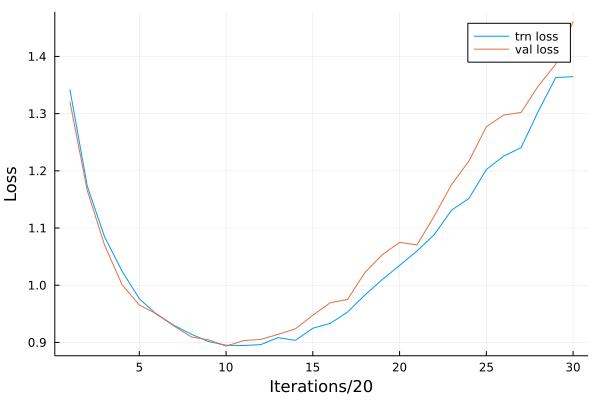

In [38]:
using Plots
results = load("/Users/ufukaltun/Documents/koç/dersler/ku deep learning/project/results_b_target_cartoon.jld2")["results"];
results = reshape(collect(Float32,flatten(results)),(4,:));
plot([results[3,:], results[4,:]],
    labels=["trn accuracy" "val accuracy" ],xlabel="Iterations/20",ylabel="Accuracy")

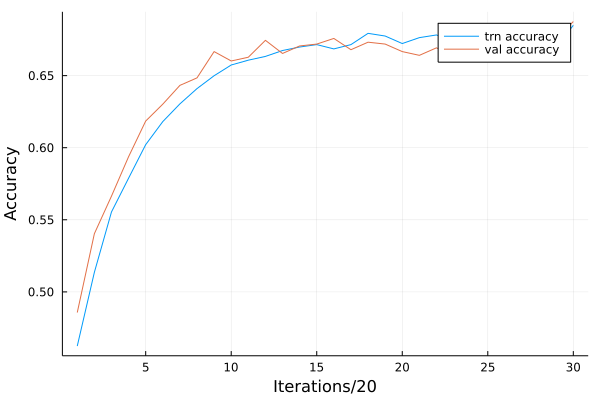

In [39]:
results = load("/Users/ufukaltun/Documents/koç/dersler/ku deep learning/project/results_gs_target_cartoon.jld2")["results"];
results = reshape(collect(Float32,flatten(results)),(4,:));
plot([results[3,:], results[4,:]],
    labels=["trn accuracy" "val accuracy" ],xlabel="Iterations/20",ylabel="Accuracy")

In [ ]:
results = load("/Users/ufukaltun/Documents/koç/dersler/ku deep learning/project/results_b_target_LabelMe.jld2")["results"];
results = reshape(collect(Float32,flatten(results)),(4,:));
plot([results[3,:], results[4,:]],
    labels=["trn accuracy" "val accuracy" ],xlabel="Iterations/20",ylabel="Accuracy")

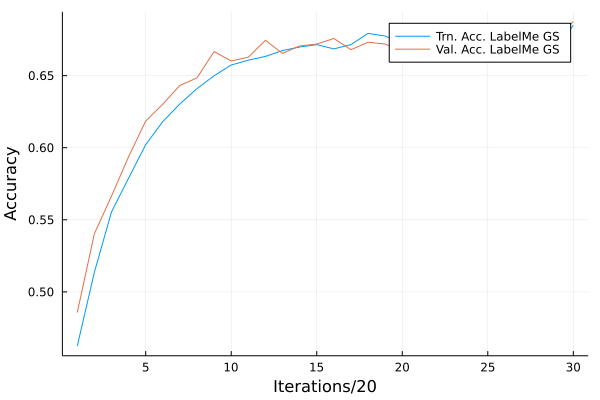

In [41]:
results = load("/Users/ufukaltun/Documents/koç/dersler/ku deep learning/project/results_gs_target_LabelMe.jld2")["results"];
results = reshape(collect(Float32,flatten(results)),(4,:));
plot([results[3,:], results[4,:]],
    labels=["Trn. Acc. LabelMe GS" "Val. Acc. LabelMe GS" ],xlabel="Iterations/20",ylabel="Accuracy")